In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

### Load data

In [2]:
train_data = pd.read_csv('train.csv')
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
test_data = pd.read_csv('test.csv')
test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


### Data Cleaning

In [4]:
# check data type of variables
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
# check whether dataset contains null value or not
train_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### Exploratory Data Analysis

In [7]:
df_desc = train_data.copy()

In [8]:
df_desc = df_desc.drop(['blue', 'four_g', 'three_g', 'dual_sim', 'wifi', 'touch_screen'], axis = 1)

In [9]:
df_desc.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0
pc,2000.0,9.91650,6.064315,0.0,5.00,10.0,15.00,20.0
px_height,2000.0,645.10800,443.780811,0.0,282.75,564.0,947.25,1960.0
px_width,2000.0,1251.51550,432.199447,500.0,874.75,1247.0,1633.00,1998.0


In [10]:
# remove data points with missing values (screen width 0)
train_data_f = train_data[train_data['sc_w'] != 0]
train_data_f.shape

(1820, 21)

In [11]:
train_data_f

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


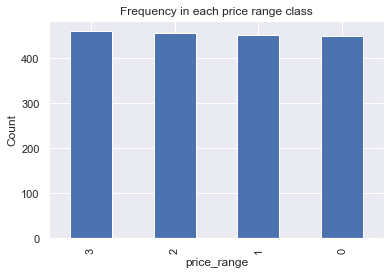

In [12]:
# visualize the number of elements in each class of mobile phones.
sns.set()
price_plot=train_data_f['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.title('Frequency in each price range class')
plt.show()

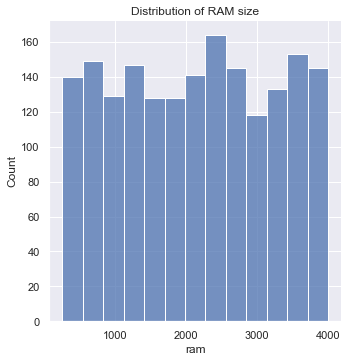

In [13]:
ax=sns.displot(data=train_data_f["ram"])
plt.title('Distribution of RAM size')
plt.show()

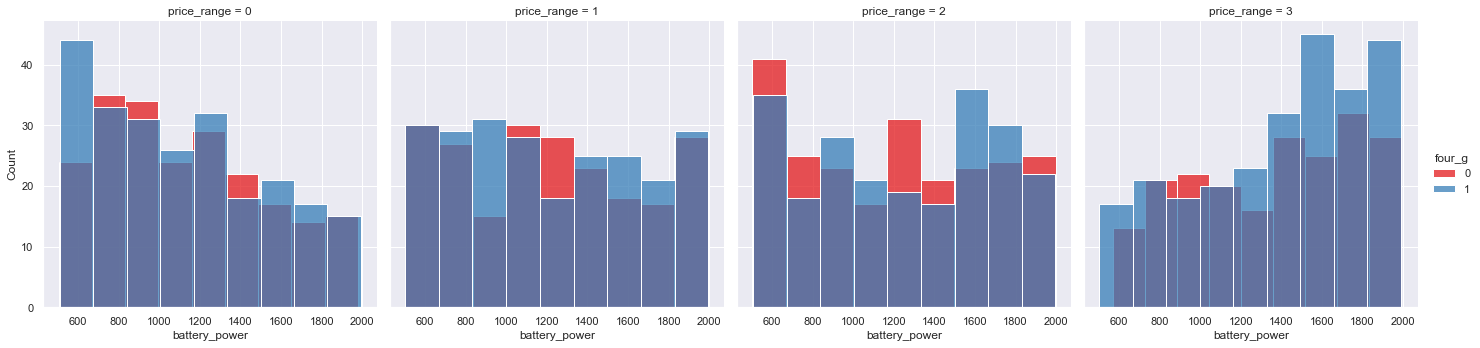

In [14]:
g = sns.FacetGrid(train_data_f, col="price_range", hue="four_g", palette="Set1",height=5)
g = (g.map(sns.histplot, "battery_power").add_legend())

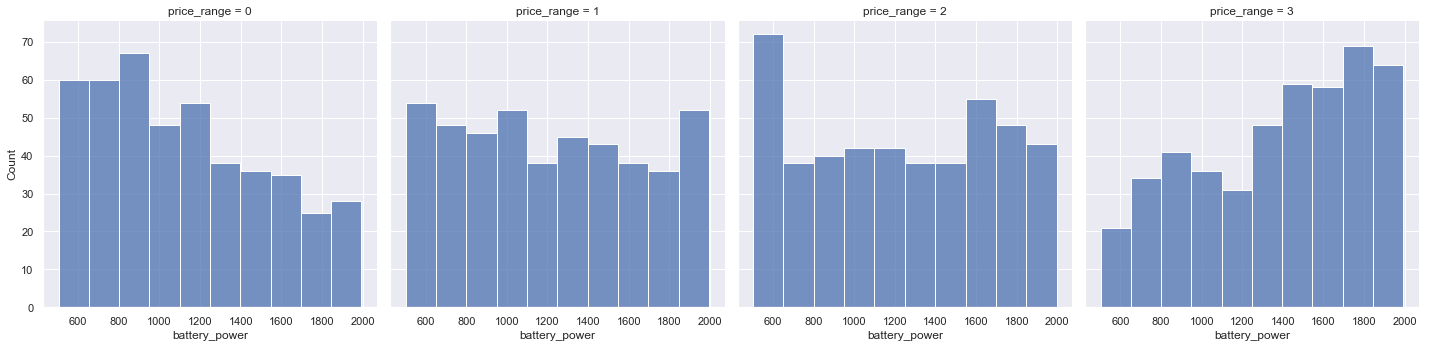

In [18]:
g = sns.FacetGrid(train_data_f, col="price_range", height=5)
g = (g.map(sns.histplot, "battery_power").add_legend())

In [14]:
train_data_f.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.027992,0.002152,-0.046354,0.027197,0.018697,-0.005402,0.034002,0.013024,-0.028151,...,0.015521,-0.003020,-0.005942,-0.044839,-0.022328,0.054852,0.006717,-0.003490,-0.003430,0.194030
blue,0.027992,1.000000,0.019804,0.018615,-0.002205,0.010622,0.042236,0.015608,-0.026841,0.031817,...,-0.010014,-0.047889,0.030894,-0.015406,-0.026305,0.016007,-0.025322,0.000981,-0.023289,0.028416
clock_speed,0.002152,0.019804,1.000000,-0.007912,-0.005542,-0.036898,0.004766,-0.011873,-0.001622,-0.014540,...,-0.008289,-0.002100,0.004992,-0.024721,-0.003689,-0.023469,-0.042981,0.030562,-0.021580,-0.004004
dual_sim,-0.046354,0.018615,-0.007912,1.000000,-0.026517,-0.008137,-0.018819,-0.015983,-0.004086,-0.017411,...,-0.026444,0.009845,0.048661,-0.008412,-0.003627,-0.029528,-0.016976,-0.013324,0.023953,0.023006
fc,0.027197,-0.002205,-0.005542,-0.026517,1.000000,-0.017656,-0.031744,-0.002944,0.032584,-0.021705,...,-0.001315,-0.004016,0.011890,-0.012276,-0.017634,-0.018514,-0.008326,-0.018925,0.006272,0.017603
four_g,0.018697,0.010622,-0.036898,-0.008137,-0.017656,1.000000,0.015415,-0.012938,-0.001657,-0.011529,...,-0.021578,0.008076,0.009220,0.029355,0.032820,-0.053015,0.588862,0.004740,-0.017816,0.014336
int_memory,-0.005402,0.042236,0.004766,-0.018819,-0.031744,0.015415,1.000000,-0.006701,-0.024979,-0.029379,...,0.006907,-0.005905,0.037839,0.036786,0.005704,-0.004404,-0.001372,-0.023362,0.012848,0.051887
m_dep,0.034002,0.015608,-0.011873,-0.015983,-0.002944,-0.012938,-0.006701,1.000000,0.030820,-0.003486,...,0.034623,0.034651,-0.011867,-0.031888,-0.011339,0.019085,-0.014938,0.006858,-0.027403,0.003064
mobile_wt,0.013024,-0.026841,-0.001622,-0.004086,0.032584,-0.001657,-0.024979,0.030820,1.000000,-0.014328,...,0.002836,0.009330,-0.000696,-0.040557,-0.038432,0.009199,0.007449,-0.011239,-0.004564,-0.023872
n_cores,-0.028151,0.031817,-0.014540,-0.017411,-0.021705,-0.011529,-0.029379,-0.003486,-0.014328,1.000000,...,0.000044,0.024963,-0.014955,-0.000930,0.021441,0.007133,-0.006844,0.029548,-0.020551,-0.010310


In [15]:
data_corr = train_data_f.copy()

In [19]:
# Applying the condition
data_corr["blue"] = np.where(data_corr["blue"] == 0, "No", "Yes")
data_corr["four_g"] = np.where(data_corr["four_g"] == 0, "No", "Yes")
data_corr["three_g"] = np.where(data_corr["three_g"] == 0, "No", "Yes")
data_corr["dual_sim"] = np.where(data_corr["dual_sim"] == 0, "No", "Yes")
data_corr["wifi"] = np.where(data_corr["wifi"] == 0, "No", "Yes" )
data_corr["touch_screen"] = np.where(data_corr["touch_screen"] == 0, "No", "Yes")

data_corr["blue"] = data_corr["blue"].astype('category')
data_corr["four_g"] = data_corr["four_g"].astype('category')
data_corr["three_g"] = data_corr["three_g"].astype('category')
data_corr["dual_sim"] = data_corr["dual_sim"].astype('category')
data_corr["wifi"] = data_corr["wifi"].astype('category')
data_corr["touch_screen"] = data_corr["touch_screen"].astype('category')

In [16]:
data_corr['price_range'] = data_corr['price_range'].replace([0, 1, 2, 3], ['Low', 'Medium', 'High', 'Very High'])
data_corr['price_range'] = data_corr['price_range'].astype('category')

In [20]:
data_corr.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,No,2.2,No,1,No,7,0.6,188,2,...,20,756,2549,9,7,19,No,No,Yes,Medium
1,1021,Yes,0.5,Yes,0,Yes,53,0.7,136,3,...,905,1988,2631,17,3,7,Yes,Yes,No,High
2,563,Yes,0.5,Yes,2,Yes,41,0.9,145,5,...,1263,1716,2603,11,2,9,Yes,Yes,No,High
3,615,Yes,2.5,No,0,No,10,0.8,131,6,...,1216,1786,2769,16,8,11,Yes,No,No,High
4,1821,Yes,1.2,No,13,Yes,44,0.6,141,2,...,1208,1212,1411,8,2,15,Yes,Yes,No,Medium
5,1859,No,0.5,Yes,3,No,22,0.7,164,1,...,1004,1654,1067,17,1,10,Yes,No,No,Medium
6,1821,No,1.7,No,4,Yes,10,0.8,139,8,...,381,1018,3220,13,8,18,Yes,No,Yes,Very High
7,1954,No,0.5,Yes,0,No,24,0.8,187,4,...,512,1149,700,16,3,5,Yes,Yes,Yes,Low
8,1445,Yes,0.5,No,0,No,53,0.7,174,7,...,386,836,1099,17,1,20,Yes,No,No,Low
9,509,Yes,0.6,Yes,2,Yes,9,0.1,93,5,...,1137,1224,513,19,10,12,Yes,No,No,Low


In [19]:
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(data_corr)
categorical_features

['blue',
 'dual_sim',
 'four_g',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [ ]:
complete_correlation= associations(data_corr, filename= 'complete_correlation.png', figsize=(14,12))

In [ ]:
# correlation plot
plt.figure(figsize=(14,12))
sns.heatmap(train_data_f.corr(), annot=True, fmt=".2f", cmap='RdPu',
           linewidth=0.1)

In [ ]:
sns.FacetGrid(train_data_f,hue='price_range',height=6).map(sns.distplot,'ram').add_legend()
plt.title('Distribution of RAM grouped by price range')

### Inferential Stats

In [21]:
# null hypothesis: there is no significant difference between price range in terms of their ram 
# alt hypothesis: there is a significant difference between price range in terms of their ram 

from scipy import stats
from scipy.stats import shapiro

#perform Shapiro-Wilk test
shapiro(train_data_f['ram'])
# result < 0.05, non-parametric test

ShapiroResult(statistic=0.9542450904846191, pvalue=1.947090309865839e-23)

In [22]:
price_range_0 = train_data_f[train_data_f['price_range'] == 0]
price_range_1 = train_data_f[train_data_f['price_range'] == 1]
price_range_2 = train_data_f[train_data_f['price_range'] == 2]
price_range_3 = train_data_f[train_data_f['price_range'] == 3]

In [23]:
# kruskal test
from scipy.stats import kruskal
kruskal(price_range_0['ram'], price_range_1['ram'], price_range_2['ram'], price_range_3['ram'])

KruskalResult(statistic=1529.7199018760662, pvalue=0.0)

In [24]:
# kruskal test
from scipy.stats import kruskal
kruskal(price_range_0['battery_power'], price_range_1['battery_power'], price_range_2['battery_power'], price_range_3['battery_power'])

KruskalResult(statistic=75.13477193701345, pvalue=3.390167220228542e-16)

In [25]:
# kruskal test
from scipy.stats import kruskal
kruskal(price_range_0['px_height'], price_range_1['px_height'], price_range_2['px_height'], price_range_3['px_height'])

KruskalResult(statistic=44.314822996249674, pvalue=1.2937822344801993e-09)

In [26]:
dual_sim_0 = train_data_f[train_data_f['dual_sim'] == 0]
dual_sim_1 = train_data_f[train_data_f['dual_sim'] == 1]

In [27]:
# mann whitney U test
from scipy.stats import mannwhitneyu
mannwhitneyu(dual_sim_0['price_range'], dual_sim_1['price_range'], alternative='two-sided')

MannwhitneyuResult(statistic=403340.5, pvalue=0.325246145981141)

### Model Training

In [28]:
X = train_data_f.drop(['price_range'], axis=1)
y = train_data_f['price_range']

In [29]:
## split data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [30]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def plot_confusion_matrix(y_test, y_pred, plt_title):
    cm = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    
    f,ax = plt.subplots(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='Blues', annot_kws={"size": 14})
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

#### Gaussian NB classifier

In [31]:
# implement the Gaussian NB classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [32]:
# perform the training and prediction
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
gnb_acc = accuracy_score(y_test,y_pred_gnb)

Gaussian NB Classifier Accuracy Score:  0.8461538461538461
              precision    recall  f1-score   support

           0       0.93      0.92      0.92        95
           1       0.79      0.73      0.76        92
           2       0.74      0.80      0.77        86
           3       0.92      0.93      0.93        91

    accuracy                           0.85       364
   macro avg       0.84      0.85      0.84       364
weighted avg       0.85      0.85      0.85       364



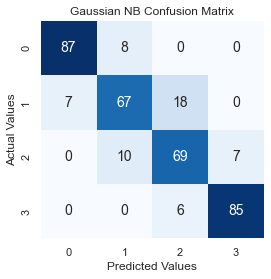

In [33]:
# check the accuracy.
print('Gaussian NB Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_gnb))
cm_gnb = plot_confusion_matrix(y_test, y_pred_gnb, 'Gaussian NB Confusion Matrix')

#### KNN classifier

In [34]:
# implementation of the KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [36]:
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_acc = accuracy_score(y_test,y_pred_knn)

KNN Classifier Accuracy Score:  0.9340659340659341
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        95
           1       0.93      0.97      0.95        92
           2       0.87      0.88      0.88        86
           3       0.94      0.90      0.92        91

    accuracy                           0.93       364
   macro avg       0.93      0.93      0.93       364
weighted avg       0.93      0.93      0.93       364



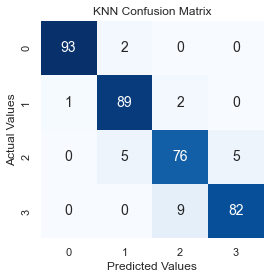

In [37]:
# check the accuracy.
print('KNN Classifier Accuracy Score: ', accuracy_score(y_test,y_pred_knn))
cm_knn = plot_confusion_matrix(y_test, y_pred_knn, 'KNN Confusion Matrix')

#### Random Forest classifier 

In [38]:
# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [39]:
rfc = RandomForestClassifier(bootstrap= True, n_estimators= 100, random_state=8, max_features= 15, min_samples_leaf=3)

In [40]:
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test,y_pred_rfc)

Random Forest Classifier Accuracy Score:  0.9120879120879121
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        95
           1       0.91      0.91      0.91        92
           2       0.83      0.88      0.85        86
           3       0.94      0.88      0.91        91

    accuracy                           0.91       364
   macro avg       0.91      0.91      0.91       364
weighted avg       0.91      0.91      0.91       364



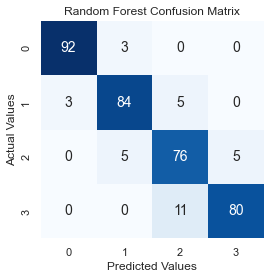

In [41]:
print('Random Forest Classifier Accuracy Score: ', accuracy_score(y_test,y_pred_rfc))
cm_rfc = plot_confusion_matrix(y_test, y_pred_rfc, 'Random Forest Confusion Matrix')

In [42]:
from sklearn.model_selection import learning_curve


train_sizes, train_scores, test_scores = learning_curve(rfc, X_train, y_train, cv=30, return_times=True)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
    
plt.figure()
plt.title("RandomForestClassifier")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.gca().invert_yaxis()
    
# box-like grid
plt.grid()
    
# plot the std deviation as a transparent range at each training set size
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
# plot the average training and test score lines at each training set size
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
# sizes the window for readability and displays the plot
# shows error from 0 to 1.1
plt.ylim(-.1,1.1)
plt.show()

ValueError: too many values to unpack (expected 3)

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rfc, X_train, y_train, cv=20, return_times=True)

plt.plot(train_sizes,np.mean(train_scores,axis=1))

In [50]:
# compare accuracy of model
data = {'Model':['Gaussian NB','KNN', 'Random Forest'], 'Accuracy': [gnb_acc, knn_acc, rfc_acc]}
compareModel = pd.DataFrame(data)
compareModel

,Model,Accuracy
0,Gaussian NB,0.846154
1,KNN,0.934066
2,Random Forest,0.912088


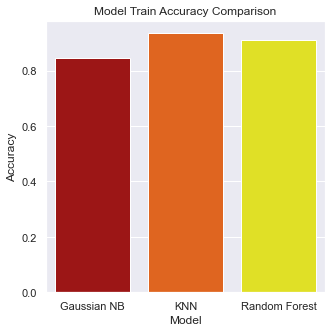

In [85]:
# Creating plot to show the train accuracy
sns.barplot(x="Model", y="Accuracy", data=compareModel, palette='hot')
# plt.text(1.85, 0.5, 'Score: 0.9121', fontsize= 16)
plt.title('Model Train Accuracy Comparison')
plt.show()

### Predict price range on test dataset

In [36]:
# Try to Predict from the test dataset with Model
dataset_test = pd.read_csv('test.csv')

In [37]:
# Price prediction of Test.csv Using KNN for Prediction
final_X_test = dataset_test.drop('id',axis=1)
final_y_pred = knn.predict(final_X_test)

In [38]:
dataset_test['Predicted Price Range'] = final_y_pred
dataset_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Predicted Price Range
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,3
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,3
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,644,913,2121,14,8,15,1,1,0,2
996,997,609,0,1.8,1,0,0,13,0.9,186,...,1152,1632,1933,8,1,19,0,1,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,477,825,1223,5,0,14,1,0,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,38,832,2509,15,11,6,0,1,0,2
